# Create data

In [1]:
import squidpy as sq
import numpy as np
import pandas as pd
import numba.types as nt

import matplotlib.pyplot as plt

# pip install git+https://github.com/h2oai/datatable.git
import datatable

import os
import csv

In [2]:
os.getcwd()

'/Users/rafaeldossantospeixoto/Library/CloudStorage/OneDrive-JohnsHopkins/jefworks/crawdad/repos/crawdad_revision_analysis/running_code/squidpy'

In [3]:
meta = datatable.fread("exported_data/extsim.csv")
meta = meta.to_pandas().set_index('C0')
meta.head()

,x,y,celltypes
C0,,,
cell1...1,531.017326,256.530309,A
cell2...2,744.247799,255.383047,D
cell3...3,1145.706727,1555.464671,D
cell4...4,1816.415580,840.300727,D
cell5...5,403.363862,1431.803866,A


In [4]:
meta['celltypes'] = meta['celltypes'].astype("category") # like levels in R, need for squidpy stuff
meta['celltypes']

C0
cell1...1           A
cell2...2           D
cell3...3           D
cell4...4           D
cell5...5           A
                   ..
cell7996...31996    E
cell7997...31997    E
cell7998...31998    E
cell7999...31999    E
cell8000...32000    E
Name: celltypes, Length: 32000, dtype: category
Categories (5, object): ['A', 'B', 'C', 'D', 'E']

# Squidpy

In [5]:
# just some random data for gene expression because I'm just interested in getting the coordinates and labels in there
from anndata import AnnData
from numpy.random import default_rng
rng = default_rng(42)

counts = rng.integers(0, 15, size=(meta.shape[0], 50))
counts.shape

(32000, 50)

In [6]:
adata = AnnData(counts, obsm={"spatial": np.array(meta[["x", "y"]], dtype=float)})

In [7]:
adata.obs = meta

In [8]:
adata.obs

,x,y,celltypes
C0,,,
cell1...1,531.017326,256.530309,A
cell2...2,744.247799,255.383047,D
cell3...3,1145.706727,1555.464671,D
cell4...4,1816.415580,840.300727,D
cell5...5,403.363862,1431.803866,A
...,...,...,...
cell7996...31996,1103.216218,2185.712676,E
cell7997...31997,791.216787,2184.716768,E
cell7998...31998,1880.209470,2760.266884,E


/Users/rafaeldossantospeixoto/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


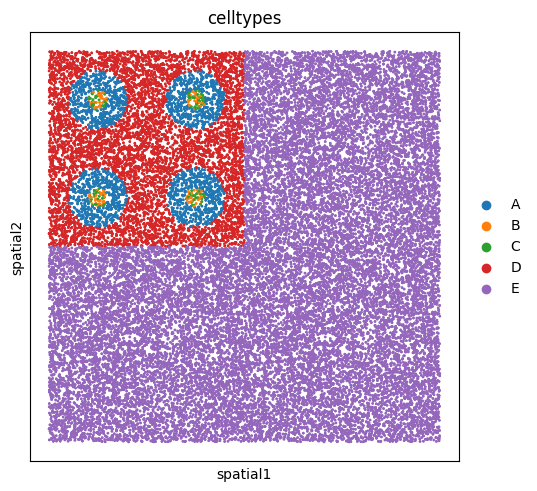

In [9]:
sq.pl.spatial_scatter(
        adata,
        shape=None,
        color = "celltypes",
        size=3
)

# Spatial Neighborhood

In [10]:
sq.gr.spatial_neighbors(adata, delaunay=False, radius=50, coord_type="generic", key_added="r50")

/Users/rafaeldossantospeixoto/anaconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1000/1000 [00:03<00:00, 314.68/s]


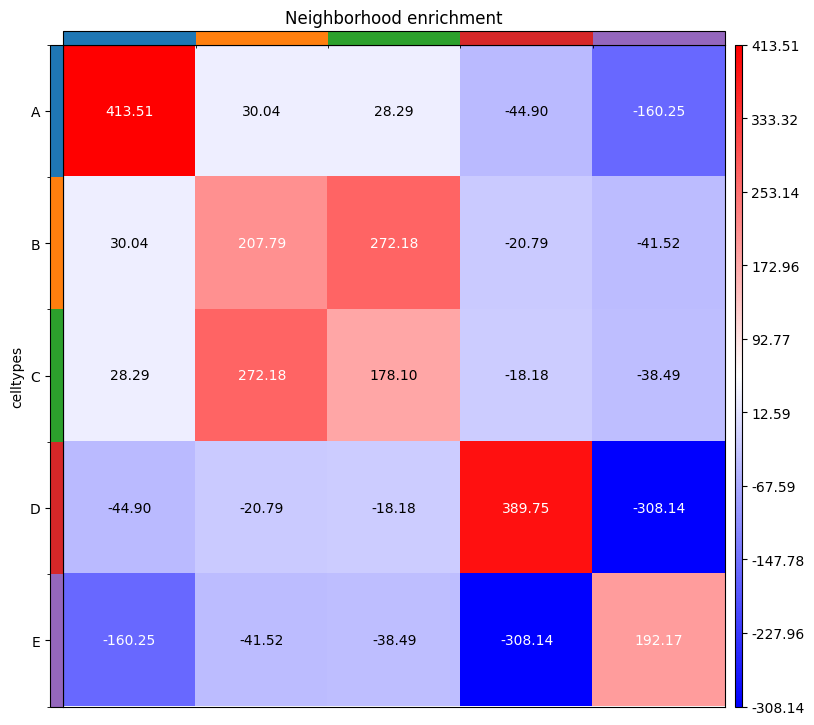

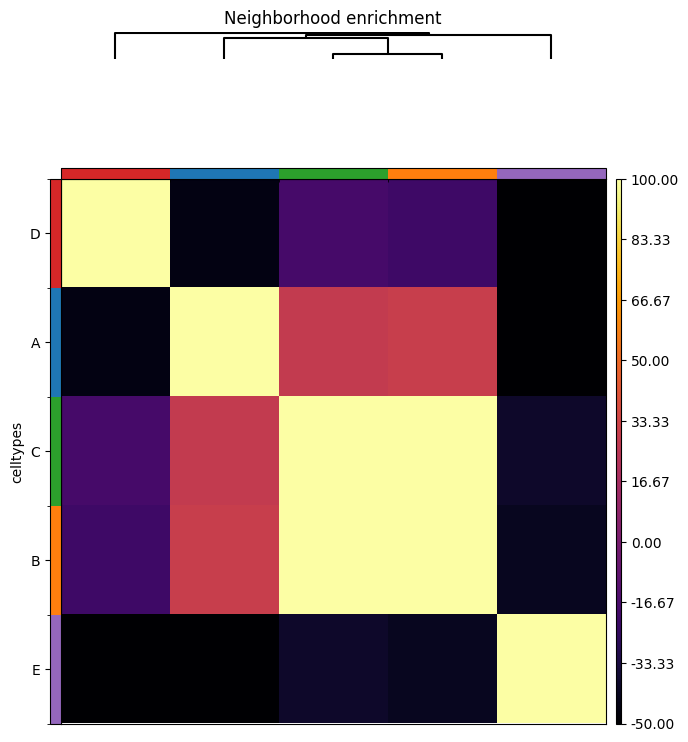

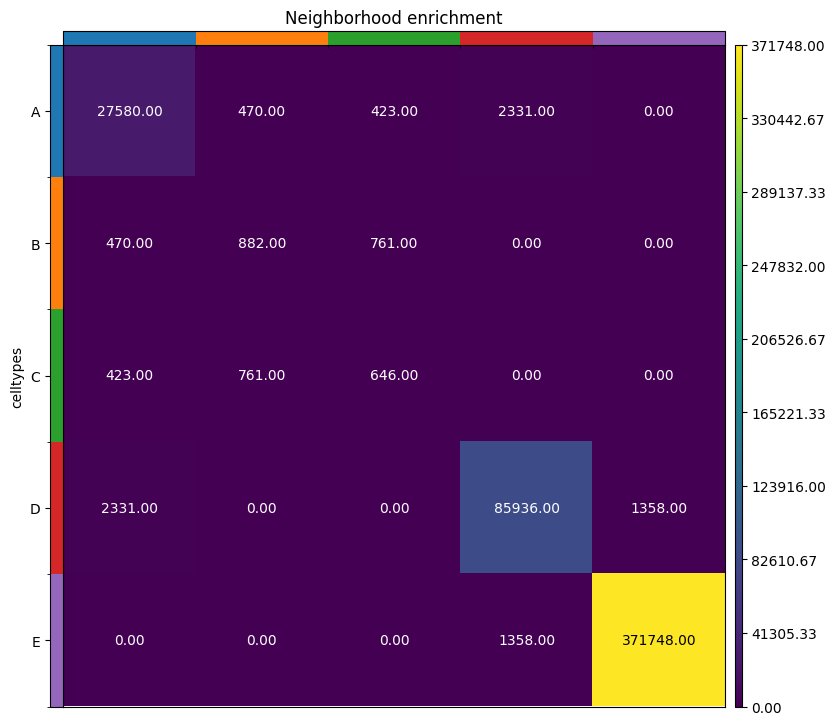

In [11]:
sq.gr.nhood_enrichment(adata, cluster_key="celltypes", connectivity_key="r50")
sq.pl.nhood_enrichment(adata, cluster_key="celltypes", mode="zscore", annotate=True, figsize=(7,7), cmap="bwr", save="spat_ngb_extsim.pdf")
sq.pl.nhood_enrichment(adata, cluster_key="celltypes", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100, figsize=(7,7))
sq.pl.nhood_enrichment(adata, cluster_key="celltypes", mode="count", annotate=True, figsize=(7,7))